This is just a small bit of exploratory analysis here to hypothesise about the data, and get some rough ideas about factors for survival.

Some rough thoughts to answer: 
 1. What is the likelihood of survival in % in general. 
 2. Sex as correlated with survival.
 3. How does class correlate with survival chances.
 4. Age as correlated to survival. (bucket age?)
 5. Where people embarked affects anything?  
 6. Does having a sibling affect your changces of survival? (my expectation is that it reduces your survival  chances, BUT if one sibling survives, then I expect the other sibling also has a higher chance of survival - ie. both or none. )

In [9]:
#pip install tabulate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\thisa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from tabulate import tabulate

In [2]:
df = pd.read_csv('data_sets/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# Data Dictionary
t_head = ['Variable', 'Definition', 'Key']
r_1 = ['survival','Survival','0 = No, 1 = Yes']
r_2 = ['pclass','Ticket class: A proxy for socio-economic status (SES)','1 = Upper, 2 = Middle, 3 = Lower']
r_3 = ['sex', 'Sex']
r_4 = ['Age', 'Age in years']
r_5 = ['sibsp','# of siblings / spouses aboard the Titanic']
r_6 = ['parch', '# of parents / children aboard the Titanic','Some children travelled only with a nanny, therefore parch=0 for them.']
r_7 = ['ticket', 'Ticket number']
r_8 = ['fare', 'Passenger fare']
r_9 = ['cabin', 'Cabin number']
r_10 = ['embarked','Port of Embarkation','C = Cherbourg, Q = Queenstown, S = Southampton']
table = [t_head, r_1,r_2, r_3, r_4, r_5, r_6, r_7, r_8, r_9, r_10]
print(tabulate(table, headers = "firstrow" ))

Variable    Definition                                             Key
----------  -----------------------------------------------------  ----------------------------------------------------------------------
survival    Survival                                               0 = No, 1 = Yes
pclass      Ticket class: A proxy for socio-economic status (SES)  1 = Upper, 2 = Middle, 3 = Lower
sex         Sex
Age         Age in years
sibsp       # of siblings / spouses aboard the Titanic
parch       # of parents / children aboard the Titanic             Some children travelled only with a nanny, therefore parch=0 for them.
ticket      Ticket number
fare        Passenger fare
cabin       Cabin number
embarked    Port of Embarkation                                    C = Cherbourg, Q = Queenstown, S = Southampton


In [5]:
# size of the data frame
df.shape  

(891, 12)

In [8]:
# Description of the types of data in the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Some descriptive statistics from the data frame
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#saving some variables
total_passengers = df['PassengerId'].count()
survived_or_not = df.value_counts(['Survived'])
survived = survived_or_not[1]
died = survived_or_not[0]
survival_rate = ((survived/total_passengers) * 100).round(1)
death_rate = ((died/total_passengers) * 100).round(1) # rounding for ease of reading, do't do calculations though!

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

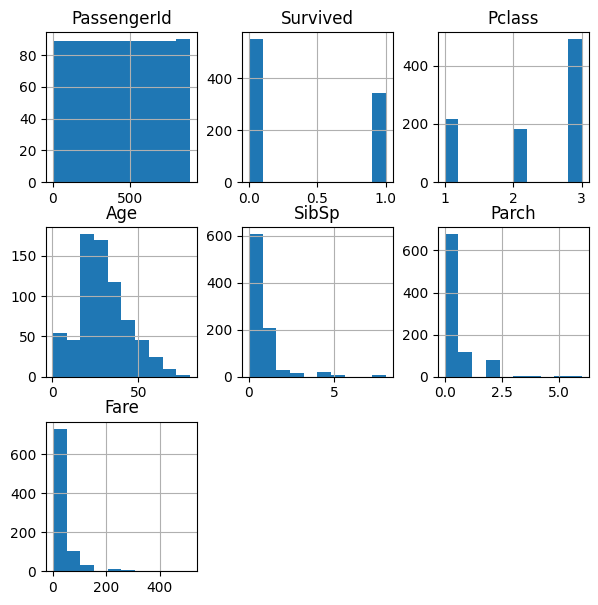

In [27]:
# Histograms of numerical columns
df.hist(bins = 10, figsize=(7,7))

<Axes: >

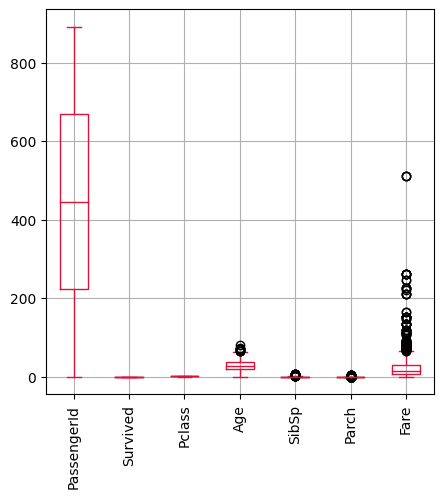

In [28]:
# Boxplots for the numerical columns
df.boxplot(figsize=(5,5), rot=90, color= "Crimson")

C:\Users\thisa\AppData\Local\Temp\ipykernel_73656\424385.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


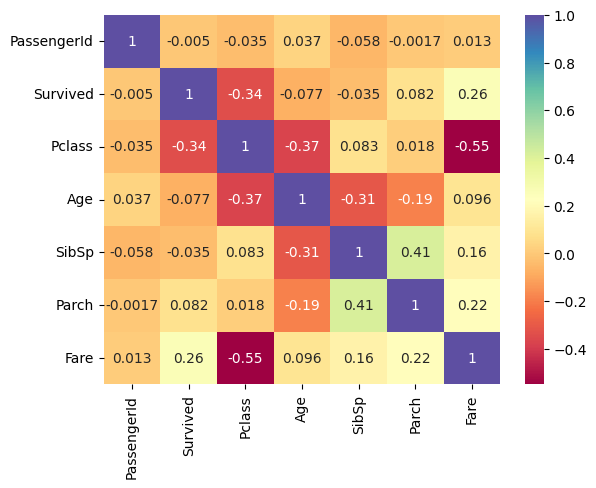

In [29]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot = True, cmap="Spectral")
plt.show()

## #1. What is the likelihood of survival in general? 

In [8]:
print(f'The overall survival rate was {survival_rate} %')
print(f'The overall death rate was {death_rate} %')

The overall survival rate was 38.4 %
The overall death rate was 61.6 %


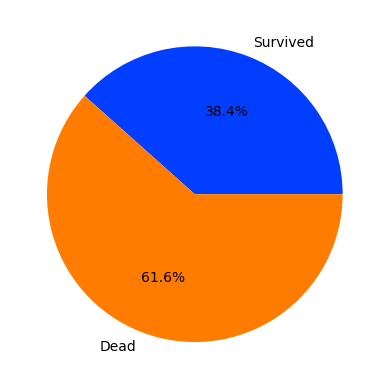

In [15]:
# Display the likelihood of survival in a pie chart
color = sns.color_palette('bright')[0:5]  #define Seaborn color palette to use
plt.pie([survival_rate, death_rate], labels = ['Survived', 'Dead'], colors = color, autopct ="%.1f%%")
plt.show()

## #2. What is the relationship between sex and survival rate? 

We already know that women were more likely to survive than men, but at what rate? 

In [199]:
groupby_sex = df.groupby(['Sex'])
#rough overview of the data so we can see how it should look
# normalise = True so we get percentages so it's easier to see if anything looks totally wrong
mfsurvival_rates = groupby_sex['Survived'].value_counts(normalize = True)
mfsurvival_rates

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

Text(0, 0.5, 'Survived')

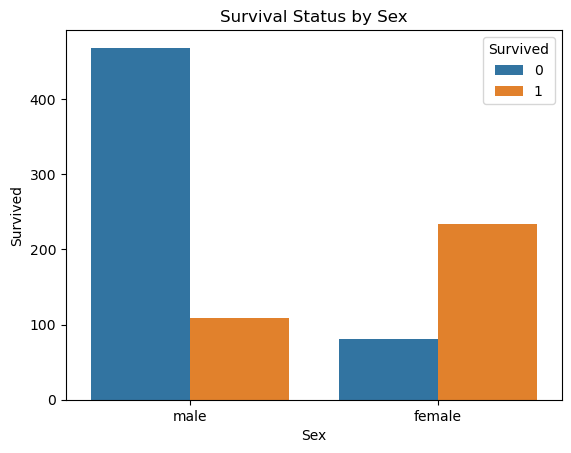

In [200]:
sns.countplot(data=df, x='Sex', hue='Survived')

# Set plot title and labels
plt.title('Survival Status by Sex')
plt.xlabel('Sex')
plt.ylabel('Survived')

## #3. How does passenger class correlate with survival rate? 

Think we can assume that first class folks are likely to do best, as is usually the way of the world. But by how much? 

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

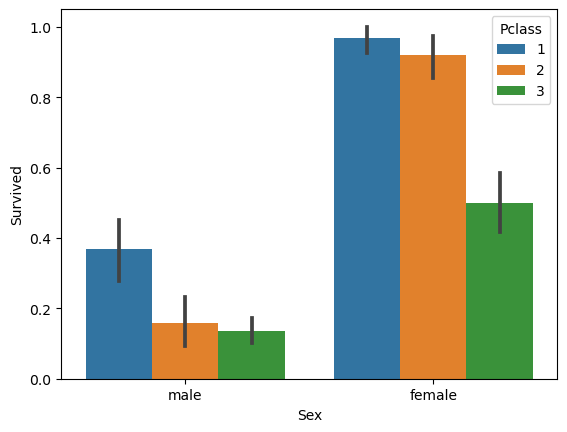

In [201]:
sns.barplot(data = df, x="Sex", y="Survived", hue ="Pclass")

I actually didn't expect it to be the case that even 3rd class women were better off than first class men in terms of survival rate. 

## 4. Any correlation between age and survival rate?

In [202]:
#Just out of interest- who is the oldest and youngest survivor? 
passengers_survived = df[df['Survived'] == 1]
oldest_age = passengers_survived['Age'].max()
print(oldest_age)
youngest_age = passengers_survived['Age'].min()
print(youngest_age)


80.0
0.42


In [203]:
oldest_row = df.loc[df['Age'].idxmax()]
youngest_row = df.loc[df['Age'].idxmin()]
oldest_survivor = (oldest_row['Name'])
youngest_survivor = (youngest_row['Name'])

print(f'The oldest survivor was called {oldest_survivor} and they were {oldest_age}.')
print(f'The youngest survivor was called {youngest_survivor} and they were {youngest_age}.')

The oldest survivor was called Barkworth, Mr. Algernon Henry Wilson and they were 80.0.
The youngest survivor was called Thomas, Master. Assad Alexander and they were 0.42.


## 5. Any correlation between where a passenger embarks and survival rate?

In [204]:
df.value_counts(['Embarked'])

#S = Southampton
#C = Some place in France
#Q = Cobh (In Ireland) after they ditched the shitty colonial name - it was called Queenstown at the time

Embarked
S           644
C           168
Q            77
dtype: int64

Following graph is the survival rates based on only where folks embarked, disregarding all other factors. 

<AxesSubplot:xlabel='PassengerId', ylabel='Embarked'>

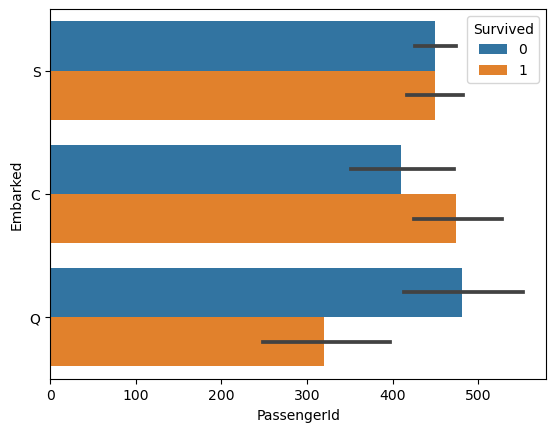

In [205]:
sns.barplot(data = df, x="PassengerId", y="Embarked", hue ="Survived")

It seems to indicate that getting on in Cobh gave you a statistically rather low chance of survival.

Let's take sex into account and see what difference it makes

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

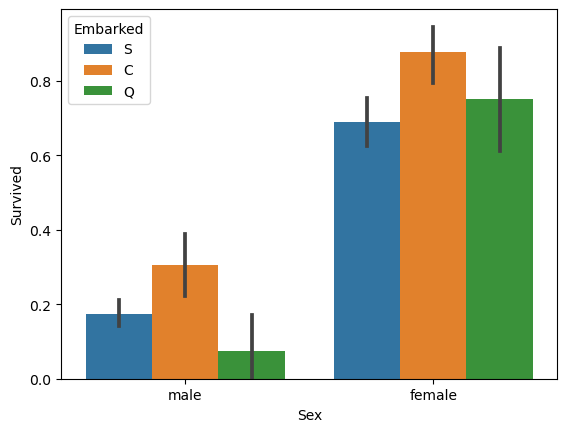

In [206]:
sns.barplot(data = df, x="Sex", y="Survived", hue ="Embarked")

Fellas that embarked in Ireland were significantly less likely to survive than a woman who embarked in France - they have statistically the largest chance of survival.

Out of interest, what is the sex breakdown of embarkation? Did a lot more men embark in Ireland? 


<AxesSubplot:xlabel='Embarked', ylabel='count'>

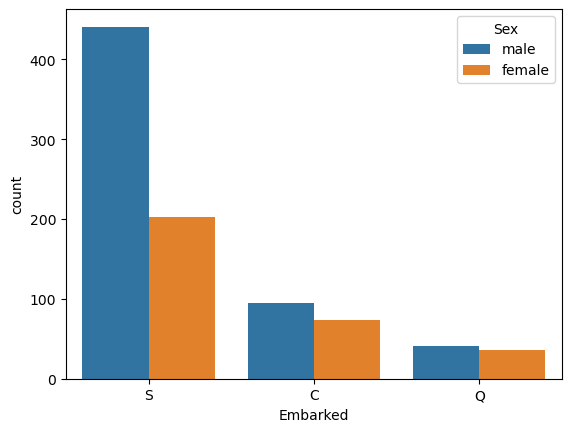

In [207]:
sns.countplot(data = df, x="Embarked", hue = 'Sex')

Damn, that's craxy. The difference between men and women embarking in Cobh is negligible, but the death rate is staggeringly different. Bad day to be an Irish fella. 
What proportion of those men that embarked at Cobh survived?

In [208]:
mf_groupby_embarked = df.groupby(['Embarked', 'Sex'])
cobh_survival_rates = mf_groupby_embarked['Survived'].value_counts(normalize = True)
cobh_survival_rates

Embarked  Sex     Survived
C         female  1           0.876712
                  0           0.123288
          male    0           0.694737
                  1           0.305263
Q         female  1           0.750000
                  0           0.250000
          male    0           0.926829
                  1           0.073171
S         female  1           0.689655
                  0           0.310345
          male    0           0.825397
                  1           0.174603
Name: Survived, dtype: float64

So the average survival rate was 38.4%. 
The survival rate of men embarking in Cobh was roughly only 7%, with over a 92% chance you weren't gonna make it.
The highest survival rate was women embarking in France at an 87% survival rate. 